# [CSE426] Image Processing
Teaching Assistant: Hyunmin Ban (hmban1996@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P1:  Digital Image Representation (10점)

### 학습목표
- 이미지 파일을 다른 포맷으로 저장하면서 파일 포맷에 대해 이해한다.
- 스스로 간단한 이미지 처리를 하면서 OpenCV와 친숙해진다.

### 실습내용
실습은 다음 순서로 진행됩니다.
- 0) 실습에서 사용되는 패키지 import
- 1) 주어진 이미지 loading
- 2) 이미지 처리
- 3) 이미지 저장 
- 4) 파일 크기 확인
- 5) 이미지 자르기
- 6) Matplotlib로 이미지 확인
- 7) 스스로 영상처리 기술 구현
- 8) Discussion

### 점수
- 2,3) 빈칸에 대한 합 4점
- 5) 빈칸에 대해 2점
- 7)에서 코드 구현 여부에 따라 2점
- Discussion에서 2점

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export (Download) as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## Imports

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

## 1) Load Image

In [20]:
img = cv2.imread('Lenna.png') # 이미지 파일 읽기

cv2.imshow('image', img)      # 이미지 display
cv2.waitKey(0)                # keyboard입력을 대기하는 함수로 0이면 key입력까지 무한대기
cv2.destroyAllWindows()       # 화면에 나타난 윈도우를 종료

## 2) Processing Image

**요구사항**
- 이미지 전체 밝기를 50만큼 줄이세요

In [21]:
def process_image(image, factor):
    # image를 float로 변환 후 
    # 이미지 전체 밝기를 50(factor)만큼 줄이세요
    # image와 변수 factor를 빼준 뒤 numpy clip 함수를 사용하여 0 ~ 255 값으로 clipping 후 
    # 다시 uint8로 변환 
    img_p = image.astype(np.float32) #image를 float형으로 변환
    img_p = np.clip(img_p - factor ,0 ,255) #float형으로 변환한 image에서 50만큼 빼 준후 0~255 값으로 clipping
    result = img_p.astype(np.uint8) #다시 uint8형으로 변환
    return result

In [22]:
processed_img = process_image(img, 50)

In [23]:
cv2.imshow('processed image', processed_img)      # 이미지 display
cv2.waitKey(0)                # keyboard입력을 대기하는 함수로 0이면 key입력까지 무한대기
cv2.destroyAllWindows()       # 화면에 나타난 윈도우를 종료

## 3) Save Image

In [24]:
def save_image(fileName, image, png_compression=None, jpg_quality=None):
    # jpg quality는 0 ~ 100 사이 값을 입력으로 받아 값이 높을 수록 화질이 더 좋다
    # png compression은 0 ~ 9 사이 값을 입력으로 받아 값이 높을 수록 압축률이 더 높다
    if png_compression:
        cv2.imwrite(fileName, image, [int(cv2.IMWRITE_PNG_COMPRESSION),png_compression])
    elif jpg_quality:
        cv2.imwrite(fileName, image, [int(cv2.IMWRITE_JPEG_QUALITY),jpg_quality])
    else:
        cv2.imwrite(fileName, image)

In [25]:
png_filename = "Save_Lenna.png"                  # 저장할 파일 이름
save_image(png_filename, img, png_compression=100)  # png compression 설정하면서 파일 크기 확인 -> 100으로 설정 시 화질 손상이 없음

jpg_filename = "Save_Lenna.jpg"
save_image(jpg_filename, img, jpg_quality=9)      # jpg quality 설정하면서 영상 화질 확인 -> 9로 설정하였더니 압축률이 높고, 화질이 저하되며, 파일 크기 감소

bmp_filename = "Save_Lenna.bmp"
save_image(bmp_filename, img)

## 4) Check File Size 

In [13]:
file_size = os.path.getsize(png_filename)
print("PNG file size: " + str(file_size) + " Bytes")

file_size = os.path.getsize(jpg_filename)
print("JPG file size: " + str(file_size) + " Bytes")

file_size = os.path.getsize(bmp_filename)
print("BMP file size: " + str(file_size) + " Bytes")

PNG file size: 512809 Bytes
JPG file size: 9066 Bytes
BMP file size: 786486 Bytes


## 5) Crop Image

**요구사항**
- 가로 시작점을 150, 세로 시작점을 200으로 해서 height가 300, width가 200인 이미지로 crop하세요.  

In [26]:
def crop_image(image):
    ROI = image[200:500, 150:350] # Region of interest -> [y축, x축], height가 300이므로 200에서 500까지, width가 200이므로 150에서 350까지 설정.
    return ROI

In [27]:
png = cv2.imread(png_filename) # 저장한 PNG파일 읽기
jpg = cv2.imread(jpg_filename) # 저장한 JPG파일 읽기
bmp = cv2.imread(bmp_filename) # 저장한 BMP파일 읽기

cropped_png = crop_image(png)
cropped_jpg = crop_image(jpg)
cropped_bmp = crop_image(bmp)

## 6) Check Images with Matplotlib

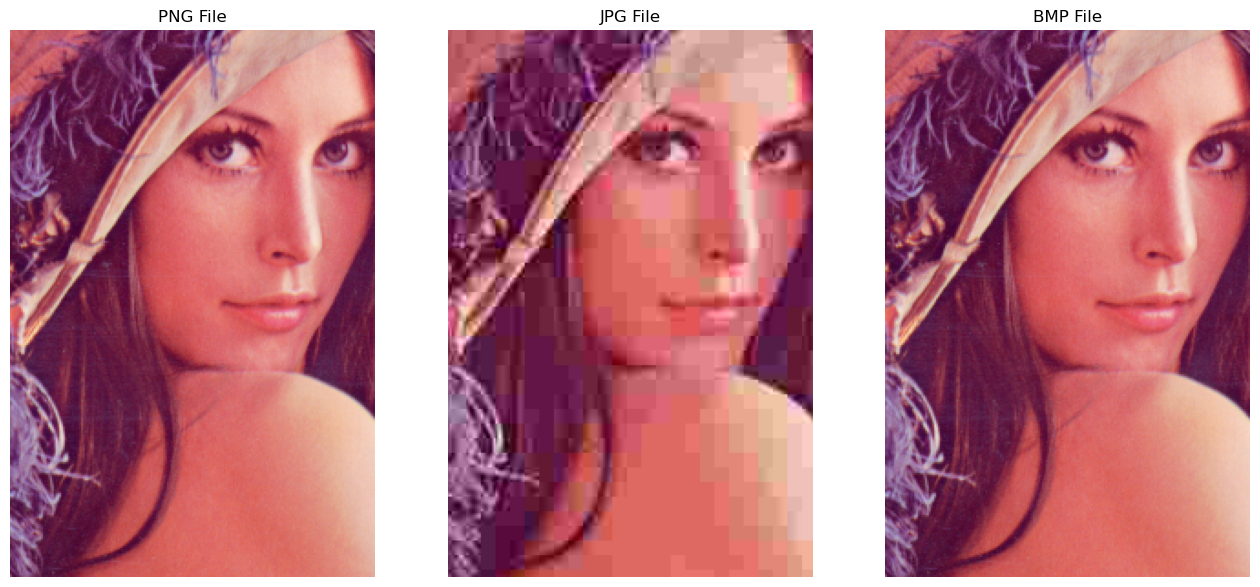

In [28]:
fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(1,3,1)
# OpenCV는 BGR로 이미지를 저장하기 때문에 Plot하기 위해 RGB로 변환해야 된다
ax1.imshow(cv2.cvtColor(cropped_png,cv2.COLOR_BGR2RGB))
ax1.set_title('PNG File')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(cv2.cvtColor(cropped_jpg,cv2.COLOR_BGR2RGB))
ax2.set_title('JPG File')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(cv2.cvtColor(cropped_bmp,cv2.COLOR_BGR2RGB))
ax3.set_title('BMP File')
ax3.axis("off")

plt.show()

## 7) Your Own Image Processing

아래 링크에서 함수들을 참고하여 자기 자신만의 이미지 처리를 해보세요. 함수를 사용 안하고 직접 구현해도 됩니다.  
https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

In [29]:
### Your code for your own image processing (for example, channel shuffle, image blending)

# 1. 원하는 사진을 가져와 cv2.imread로 읽어오기
# 2. 간단한 이미지 처리 기술로 이미지 변환
# 3. 이미지를 plot 혹은 imshow로 보이기

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

img = cv.imread('Lenna.png')

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV_FULL)

lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

mask = cv.inRange(hsv_img, lower_red, upper_red)

res = cv.bitwise_and(img, img, mask=mask)

bgr_img = cv.cvtColor(hsv_img, cv.COLOR_HSV2BGR)

cv.imshow("original", img)
cv.imshow("bgr", bgr_img)
cv.imshow('mask', mask)
cv.imshow('res', res)
cv.waitKey(0)
cv.destroyAllWindows()

## 8) Discussion

**1) 이미지를 저장할 때 각 이미지 포맷 (PNG, JPG, BMP, TIFF) 특징에 대해 설명(특히 화질과 용량, 압축/무압축 측면에서)하세요.**

PNG (Portable Network Graphics)
화질: 고화질, 투명도를 지원하여 배경 제거 가능
용량: 무압축이나 무손실 압축, 그러나 JPG에 비해 용량이 큼
압축/무압축: 무압축 또는 무손실 압축 (Zip 알고리즘)

JPG (Joint Photographic Experts Group)
화질: 압축률에 따라 화질이 감소할 수 있음, 투명도를 지원하지 않음
용량: 압축률에 따라 용량이 달라짐, 대부분의 이미지 뷰어에서 지원
압축/무압축: 손실 압축 (DCT 알고리즘)

BMP (Bitmap)
화질: 고화질, 투명도를 지원하지 않음
용량: 무압축, 용량이 크고 대용량 이미지에 적합하지 않음
압축/무압축: 무압축

TIFF (Tagged Image File Format)
화질: 고화질, 다양한 색상 공간과 투명도 지원, 대용량 이미지 처리 가능
용량: 압축 방법에 따라 용량이 달라짐
압축/무압축: 무압축 또는 다양한 압축 방법 (LZW, ZIP, JPEG 알고리즘)

**2) 스스로 영상처리 기술을 구현하면서 어떤 기술을 넣었는지 설명하세요.**

cv.imread('Lenna.png'): Lenna.png 파일을 현재 디렉토리에서 읽어온다.

cv.cvtColor(img, cv.COLOR_BGR2HSV_FULL): BGR 컬러 스페이스에서 HSV 컬러 스페이스로 이미지를 변환한다. 

np.array([0, 50, 50]), np.array([10, 255, 255]): 빨간색 계열에 해당하는 범위를 지정한다.

cv.inRange(hsv_img, lower_red, upper_red): 원하는 범위 내에 있는 픽셀을 마스크로 만든다.

cv.bitwise_and(img, img, mask=mask): 마스크를 사용하여 이미지에서 해당 색상의 부분만 추출한다.

cv.cvtColor(hsv_img, cv.COLOR_HSV2BGR): HSV 컬러 스페이스에서 BGR 컬러 스페이스로 이미지를 변환한다.

cv.imshow(): 각 이미지를 화면에 표시한다.

cv.waitKey(0), cv.destroyAllWindows(): 사용자가 키를 입력하기 전까지 화면을 유지하고, 모든 창을 닫는다.